In [2]:
%matplotlib inline

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso, ElasticNetCV, RidgeCV, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error

In [98]:
train = pd.read_csv('../input/train.csv')

In [99]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [119]:
#train[train.LotFrontage.isnull() == False]

In [175]:
def load_data():
    train = pd.read_csv('../input/train.csv')
    test = pd.read_csv('../input/test.csv')
    combined = train.append(test, ignore_index=True).drop(['Id','SalePrice'], axis=1)
    combined = combined[['LotFrontage', 'LotArea', 'LotConfig', 'Condition1', 'BldgType', 'RoofMatl', 
                     '1stFlrSF', 'GarageType', 'GarageCars']]
    combined = pd.get_dummies(combined)
    
    combined = combined[combined.LotFrontage.isnull() == False]
    
    combined = combined.fillna(combined.mean())
    y = combined['LotFrontage']
    X = combined.drop(['LotFrontage'], axis=1)
    return y, X

In [203]:
# loading data
y, X = load_data()

# create CV folds
kf = KFold(10, random_state=1773, shuffle=True)

# define model
#model_cv = LassoCV(cv=kf, normalize=True)
#model_cv = RidgeCV(cv=kf, normalize=True)
model_cv = ElasticNetCV(cv=kf, normalize=True)

In [204]:
from scipy.stats import boxcox, skew

In [205]:
y_transformed, _ = boxcox(y)

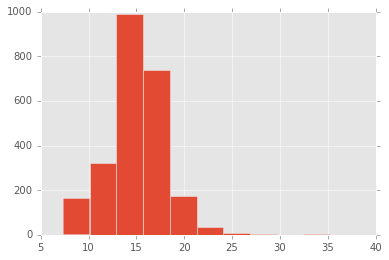

In [206]:
plt.hist(y_transformed);

In [207]:
model_cv.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True,
       cv=KFold(n_splits=10, random_state=1773, shuffle=True), eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=True, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [199]:
print model_cv.alpha_
print model_cv.l1_ratio_
#print model_cv.dual_gap_

0.0066020794903


AttributeError: 'LassoCV' object has no attribute 'l1_ratio_'

In [200]:
model = Lasso(alpha=0.0066020794903, normalize=True)
#model = Ridge(alpha=10.0)
#model = ElasticNet(alpha=0.000463623338699, normalize=True)

In [201]:
# score (mean): 0.5403
# score (std):  0.0382

In [202]:
# evaluate model
scores = cross_val_score(model, X, y, cv=kf)
print 'score (mean): %0.4f' % scores.mean()
print 'score (std):  %0.4f' % scores.std()

score (mean): 0.5476
score (std):  0.0887


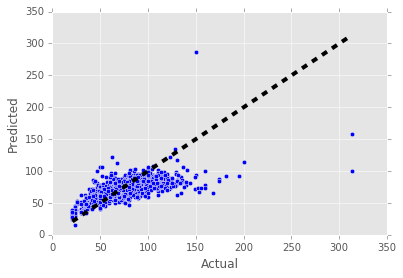

In [184]:
# plot CV preditions versus actuals
y_pred = cross_val_predict(model, X, y, cv=kf)

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted');

In [9]:
# train model
model.fit(X, y)

# create submission predictions
preds_submission = model.predict(X_submission)

# save submission
pd.DataFrame({'Id': ids_submission, 'SalePrice': preds_submission})\
  .to_csv('../output/02_default_random_forest.csv', index=False)